In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants 
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)

In [3]:
run_period = 'spring'
data_type = 'data'
df_pipkmks = tools.get_dataframe('pipkmks', run_period, data_type)
df_pimkpks = tools.get_dataframe('pimkpks', run_period, data_type)

In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)#.Filter('e_beam > 8.0 && e_beam < 9.0').Filter('mand_t < 0.5')
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)#.Filter('e_beam > 8.0 && e_beam < 9.0').Filter('mand_t < 0.5')

In [5]:
hist_ppi_pipkmks = df_pipkmks.Histo1D(('pipkmks_ppi', 'M(p#pi^{+}) [GeV]', 50, 1.0, 3.0), 'ppip_m')
hist_ppi_pipkmks_f1 = df_pipkmks.Filter('pipkmks_m > 1.24 && pipkmks_m < 1.35').Histo1D(('pipkmks_ppi', 'M(p#pi^{+}) [GeV]', 50, 1.3, 3.0), 'ppip_m')
hist_ppi_pimkpks = df_pimkpks.Histo1D(('pimkpks_ppi', 'M(p#pi^{-}) [GeV]', 50, 1.0, 3.0), 'ppim_m')
hist_ppi_pimkpks_f1 = df_pimkpks.Filter('pimkpks_m > 1.24 && pimkpks_m < 1.35').Histo1D(('pimkpks_ppi', 'M(p#pi^{-}) [GeV]', 50, 1.3, 3.0), 'ppim_m')

print('pipkmks: ', hist_ppi_pipkmks_f1.Integral())
print('pimkpks', hist_ppi_pimkpks_f1.Integral())

pipkmks:  24577.0
pimkpks 27414.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


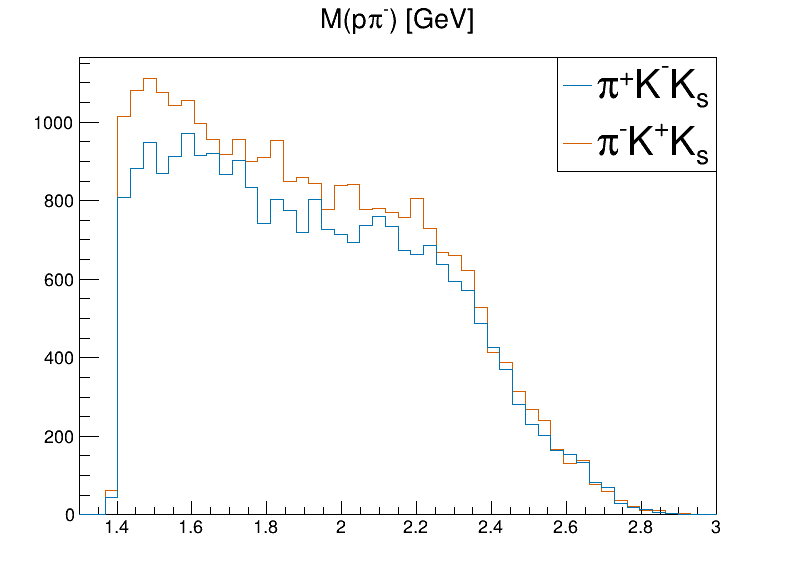

In [18]:
hist_ppi_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ppi_pipkmks_f1.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ppi_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_ppi_pimkpks_f1.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_ppi_pipkmks_f1.GetPtr(), '#pi^{+}K^{-}K_{s}', 'l')
legend.AddEntry(hist_ppi_pimkpks_f1.GetPtr(), '#pi^{-}K^{+}K_{s}', 'l')

c = ROOT.TCanvas('c', 'c', 800, 600)
# hist_ppi_pimkpks.Draw()
hist_ppi_pimkpks_f1.Draw()
# hist_ppi_pipkmks.Draw('same')
hist_ppi_pipkmks_f1.Draw('same')
legend.Draw()
c.Draw()


In [19]:
hist_pipkmks = df_pipkmks.Filter('pipkmks_m > 1.24 && pipkmks_m < 1.35').Histo1D(('pipkmks', 'M(#pi^{+}K^{-}K^{0}_{S}) [GeV]', 40, 1.2, 1.4), 'pipkmks_m')
hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks = df_pimkpks.Filter('pimkpks_m > 1.24 && pimkpks_m < 1.35').Histo1D(('pimkpks', 'M(#pi^{+}K^{-}K^{0}_{S}) [GeV]', 40, 1.2, 1.4), 'pimkpks_m')
hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

print('pipkmks: ', hist_pipkmks.Integral())
print('pimkpks', hist_pimkpks.Integral())

pipkmks:  24577.0
pimkpks 27414.0


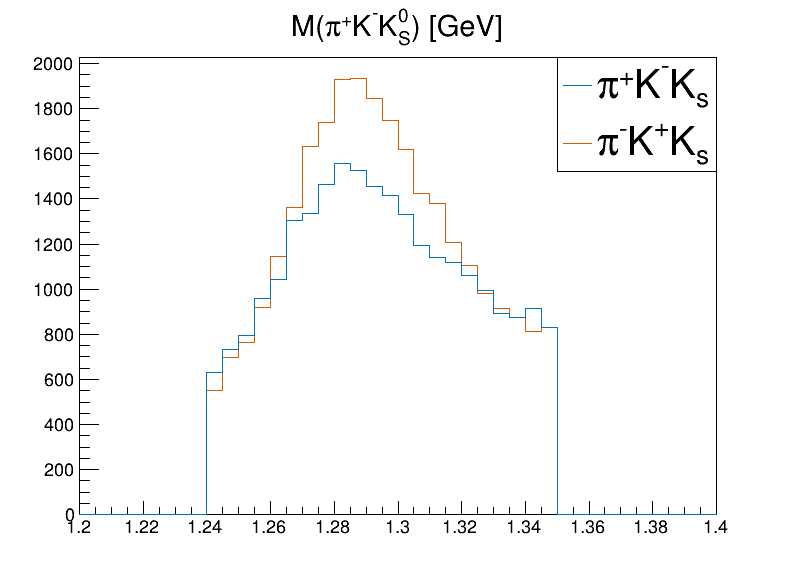

In [20]:
hist_pimkpks.Draw()
hist_pipkmks.Draw('same')
legend.Draw()
c.Draw()


In [21]:
df_nocuts_pipkmks = tools.get_dataframe('pipkmks', run_period, data_type, filtered=False)
df_nocuts_pimkpks = tools.get_dataframe('pimkpks', run_period, data_type, filtered=False)